In [1]:
library(tidyverse)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
box_office_drops <- c("first_box_office_drop", "second_box_office_drop", 
                      "third_box_office_drop", "fourth_box_office_drop")
movies <- read_csv("Vant 149-Data Collection.csv") |>
    rename(movie_name = "Movie's Name",
           audience_rating = "Audience Rating",
           critics_rating = "Critics Rating",
           first_box_office_drop = "1st Box Office Opening Drop",
           second_box_office_drop = "2nd Week's Box Office Drop",
           third_box_office_drop = "3rd Week's Box Office Drop",
           fourth_box_office_drop = "4th Week's Box Office Drop",
           domestic_box_office_opening = "Domestic Box Office Opening",
           distributor = "Distributor",
           genre = "Genre") |>
    separate(first_box_office_drop,"first_box_office_drop", "%") |>
    separate(second_box_office_drop, "second_box_office_drop", "%") |>
    separate(third_box_office_drop, "third_box_office_drop", "%") |>
    separate(fourth_box_office_drop, "fourth_box_office_drop", "%") |>
    mutate(first_box_office_drop = as.numeric(first_box_office_drop),
           second_box_office_drop = as.numeric(second_box_office_drop),
           third_box_office_drop = as.numeric(third_box_office_drop),
           fourth_box_office_drop = as.numeric(fourth_box_office_drop))
head(movies)

Rows: 200 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Movie's Name, 1st Box Office Opening Drop, 2nd Week's Box Office Dr...
dbl (2): Audience Rating, Critics Rating
num (1): Domestic Box Office Opening

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 1 pieces. Additional pieces discarded in 200 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 1 pieces. Additional pieces discarded in 200 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 1 pieces. Additional pieces discarded in 200 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 1 pieces. Additional pieces discarded in 200 rows [1, 2, 3, 4, 5, 6,
7, 8,

movie_name           audience_rating critics_rating first_box_office_drop
1 Beverly Hills Cop II 57              46              -35.0               
2 Cars 3               68              69              -51.2               
3 Elvis                94              77              -34.2               
4 We're the Millers    76              48              -34.2               
5 American Hustle      74              92             3433.2               
6 Knocked Up           83              89              -35.7               
  second_box_office_drop third_box_office_drop fourth_box_office_drop
1 -27.5                  -30.8                 -13.7                 
2 -53.7                  -48.1                 -40.3                 
3 -41.9                  -27.1                 -17.7                 
4 -27.4                   -2.5                 -40.0                 
5 -10.9                  -50.3                 -26.2                 
6 -24.6                  -25.7                 -28.6                 
  domestic_box_office_opening distributor                        
1 26348555                    Paramount Pictures                 
2 53688680                    Walt Disney Studios Motion Pictures
3 31211579                    Warner Bros.                       
4 26419396                    Warner Bros.                       
5   740455                    Sony Pictures Releasing            
6 30690990                    Universal Pictures                 
  genre                                  
1 Action Comedy Crime Thriller           
2 Adventure Animation Comedy Family Sport
3 Biography Drama Music                  
4 Comedy Crime                           
5 Crime Drama                            
6 Comedy Romance

In [3]:
summary(movies$first_box_office_drop)
summary(movies$second_box_office_drop)
summary(movies$third_box_office_drop)
summary(movies$fourth_box_office_drop)
# Q1 <- quantile(movies, first_box_office_drop, 0.25)
# Q3 <- quantile(movies, first_box_office_drop, 0.75)
# IQR <- Q3 - Q1

# # Define outlier criteria
# lower_bound <- Q1 - 1.5 * IQR
# upper_bound <- Q3 + 1.5 * IQR

# # Filter out outliers
# remove_special_point <- movies |>
#   filter(first_box_office_drop > lower_bound & first_box_office_drop < upper_bound)

# head(remove_special_point)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -74.50   -51.45   -37.80   278.08    -9.90 38199.80        1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -64.30  -47.05  -38.35  -17.46  -25.07 2016.30 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -83.70   -45.23   -37.25   163.98   -25.65 35989.20 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -64.70   -44.12   -35.20    53.70   -25.00 15852.60 

In [4]:
remove_special_point_1 <- movies |>
  filter(first_box_office_drop > -51.45 & first_box_office_drop < -9.90)
head(remove_special_point_1)

remove_special_point_2 <- movies |>
  filter(second_box_office_drop > -47.05 & second_box_office_drop < -25.07)
head(remove_special_point_2)

remove_special_point_3 <- movies |>
  filter(third_box_office_drop > -45.23 & third_box_office_drop < -25.65)
head(remove_special_point_3)

remove_special_point_4 <- movies |>
  filter(fourth_box_office_drop > -44.12 & fourth_box_office_drop < -25.00)
head(remove_special_point_4)

movie_name           audience_rating critics_rating first_box_office_drop
1 Beverly Hills Cop II 57              46             -35.0                
2 Cars 3               68              69             -51.2                
3 Elvis                94              77             -34.2                
4 We're the Millers    76              48             -34.2                
5 Knocked Up           83              89             -35.7                
6 Megamind             72              73             -43.7                
  second_box_office_drop third_box_office_drop fourth_box_office_drop
1 -27.5                  -30.8                 -13.7                 
2 -53.7                  -48.1                 -40.3                 
3 -41.9                  -27.1                 -17.7                 
4 -27.4                   -2.5                 -40.0                 
5 -24.6                  -25.7                 -28.6                 
6 -27.5                  -42.4                 -57.1                 
  domestic_box_office_opening distributor                        
1 26348555                    Paramount Pictures                 
2 53688680                    Walt Disney Studios Motion Pictures
3 31211579                    Warner Bros.                       
4 26419396                    Warner Bros.                       
5 30690990                    Universal Pictures                 
6 46016833                    DreamWorks                         
  genre                                                        
1 Action Comedy Crime Thriller                                 
2 Adventure Animation Comedy Family Sport                      
3 Biography Drama Music                                        
4 Comedy Crime                                                 
5 Comedy Romance                                               
6 Action Adventure Animation Comedy Crime Family Fantasy Sci-Fi

movie_name           audience_rating critics_rating first_box_office_drop
1 Beverly Hills Cop II 57              46             -35.0                
2 Elvis                94              77             -34.2                
3 We're the Millers    76              48             -34.2                
4 Megamind             72              73             -43.7                
5 Lethal Weapon 2      77              82             -17.1                
6 True Lies            76              71             -25.1                
  second_box_office_drop third_box_office_drop fourth_box_office_drop
1 -27.5                  -30.8                 -13.7                 
2 -41.9                  -27.1                 -17.7                 
3 -27.4                   -2.5                 -40.0                 
4 -27.5                  -42.4                 -57.1                 
5 -25.2                  -21.1                 -24.1                 
6 -33.9                  -32.7                 -22.9                 
  domestic_box_office_opening distributor          
1 26348555                    Paramount Pictures   
2 31211579                    Warner Bros.         
3 26419396                    Warner Bros.         
4 46016833                    DreamWorks           
5 20388800                    Warner Bros.         
6 25869770                    Twentieth Century Fox
  genre                                                        
1 Action Comedy Crime Thriller                                 
2 Biography Drama Music                                        
3 Comedy Crime                                                 
4 Action Adventure Animation Comedy Crime Family Fantasy Sci-Fi
5 Action Crime Thriller                                        
6 Action Comedy Thriller

movie_name           audience_rating critics_rating first_box_office_drop
1 Beverly Hills Cop II 57              46             -35.0                
2 Elvis                94              77             -34.2                
3 Knocked Up           83              89             -35.7                
4 Megamind             72              73             -43.7                
5 True Lies            76              71             -25.1                
6 Mamma Mia!           66              55             -33.1                
  second_box_office_drop third_box_office_drop fourth_box_office_drop
1 -27.5                  -30.8                 -13.7                 
2 -41.9                  -27.1                 -17.7                 
3 -24.6                  -25.7                 -28.6                 
4 -27.5                  -42.4                 -57.1                 
5 -33.9                  -32.7                 -22.9                 
6 -29.7                  -33.7                 -26.8                 
  domestic_box_office_opening distributor          
1 26348555                    Paramount Pictures   
2 31211579                    Warner Bros.         
3 30690990                    Universal Pictures   
4 46016833                    DreamWorks           
5 25869770                    Twentieth Century Fox
6 27751240                    Universal Pictures   
  genre                                                        
1 Action Comedy Crime Thriller                                 
2 Biography Drama Music                                        
3 Comedy Romance                                               
4 Action Adventure Animation Comedy Crime Family Fantasy Sci-Fi
5 Action Comedy Thriller                                       
6 Comedy Musical Romance

movie_name        audience_rating critics_rating first_box_office_drop
1 Cars 3            68              69              -51.2               
2 We're the Millers 76              48              -34.2               
3 American Hustle   74              92             3433.2               
4 Knocked Up        83              89              -35.7               
5 The Great Gatsby  67              48              -52.2               
6 Mamma Mia!        66              55              -33.1               
  second_box_office_drop third_box_office_drop fourth_box_office_drop
1 -53.7                  -48.1                 -40.3                 
2 -27.4                   -2.5                 -40.0                 
3 -10.9                  -50.3                 -26.2                 
4 -24.6                  -25.7                 -28.6                 
5 -43.4                  -51.9                 -35.2                 
6 -29.7                  -33.7                 -26.8                 
  domestic_box_office_opening distributor                        
1 53688680                    Walt Disney Studios Motion Pictures
2 26419396                    Warner Bros.                       
3   740455                    Sony Pictures Releasing            
4 30690990                    Universal Pictures                 
5 50085185                    Warner Bros.                       
6 27751240                    Universal Pictures                 
  genre                                  
1 Adventure Animation Comedy Family Sport
2 Comedy Crime                           
3 Crime Drama                            
4 Comedy Romance                         
5 Drama Romance                          
6 Comedy Musical Romance

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

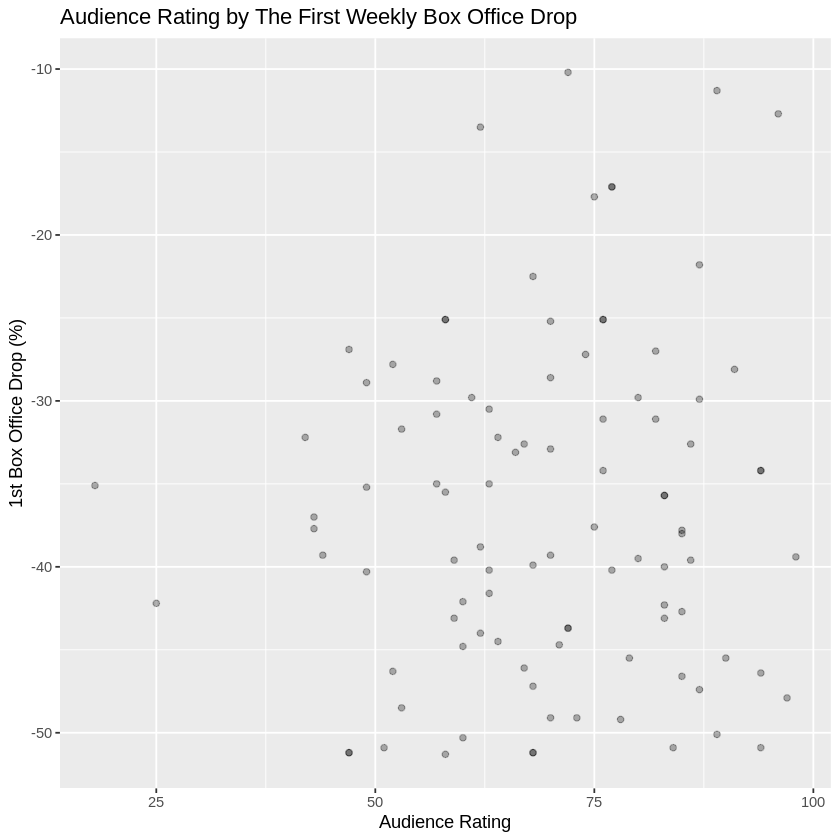

In [5]:
audience_ratig_vs_first_box_office_drop <- remove_special_point_1 |>
    ggplot(aes(x = audience_rating, y = first_box_office_drop)) +
    geom_point(alpha = 0.3) +
    labs(x = "Audience Rating", 
         y = "1st Box Office Drop (%)") +
    ggtitle("Audience Rating by The First Weekly Box Office Drop")
    theme(text = element_text(size = 12))
audience_ratig_vs_first_box_office_drop


Formula: first_box_office_drop ~ a * exp(b * audience_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -39.647223   4.867717  -8.145 1.32e-12 ***
b  -0.001113   0.001735  -0.641    0.523    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.1 on 97 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 9.389e-07


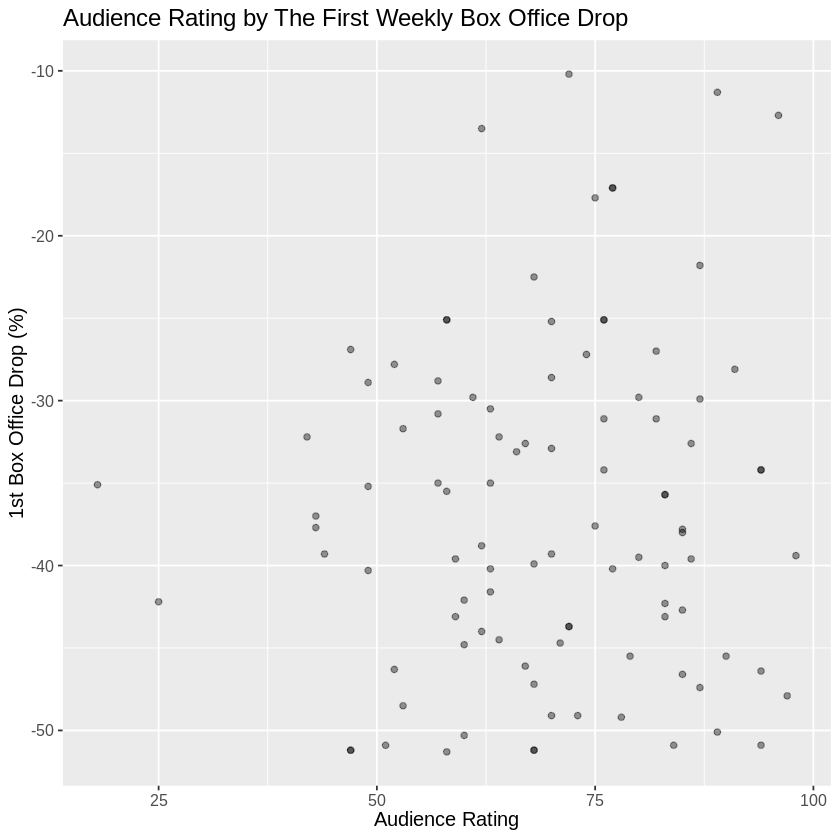

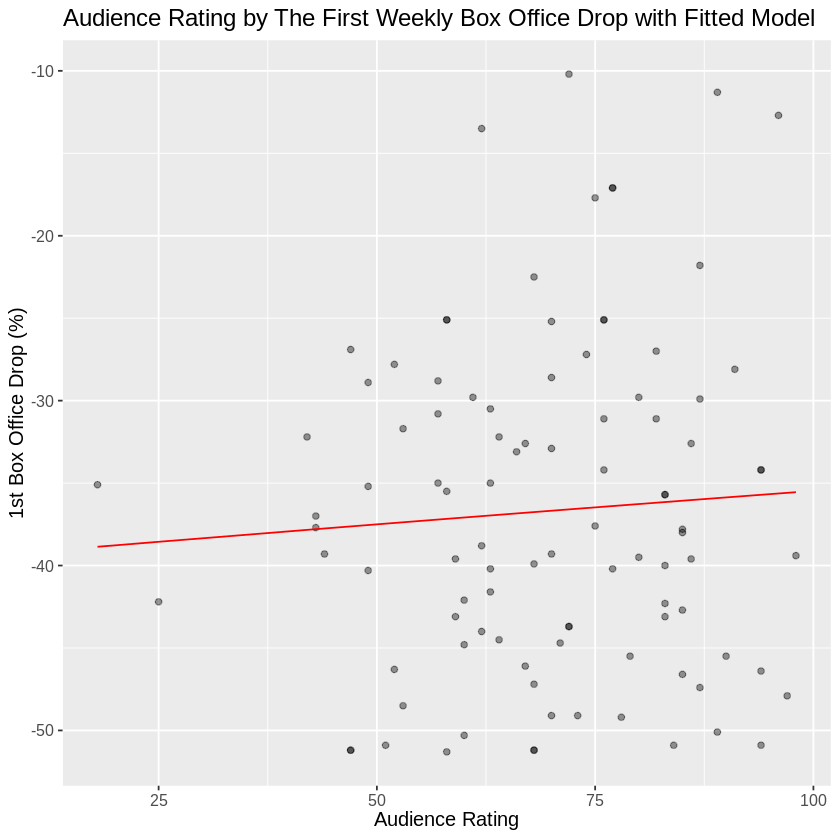

In [6]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_1)

# Visualize the data
ggplot(movie_data, aes(x = audience_rating, y = first_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Audience Rating", y = "1st Box Office Drop (%)") +
  ggtitle("Audience Rating by The First Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(first_box_office_drop ~ a * exp(b * audience_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = audience_rating, y = first_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Audience Rating", y = "1st Box Office Drop (%)") +
  ggtitle("Audience Rating by The First Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))



Formula: second_box_office_drop ~ a * exp(b * audience_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.511e+01  2.549e+00 -13.776   <2e-16 ***
b  8.994e-04  1.038e-03   0.866    0.388    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.324 on 98 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 9.439e-06


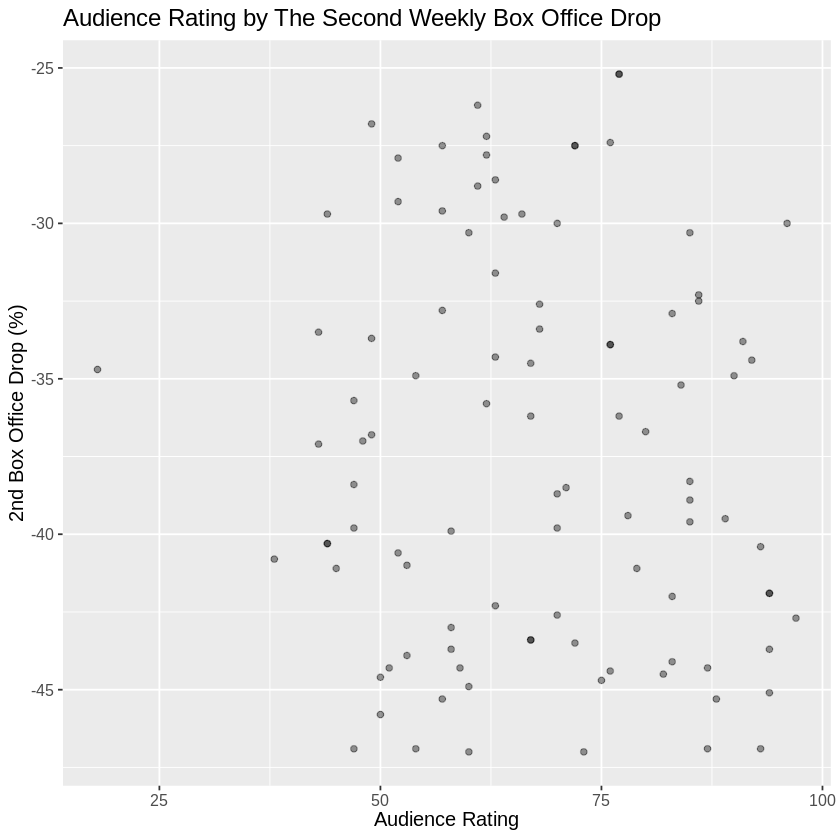

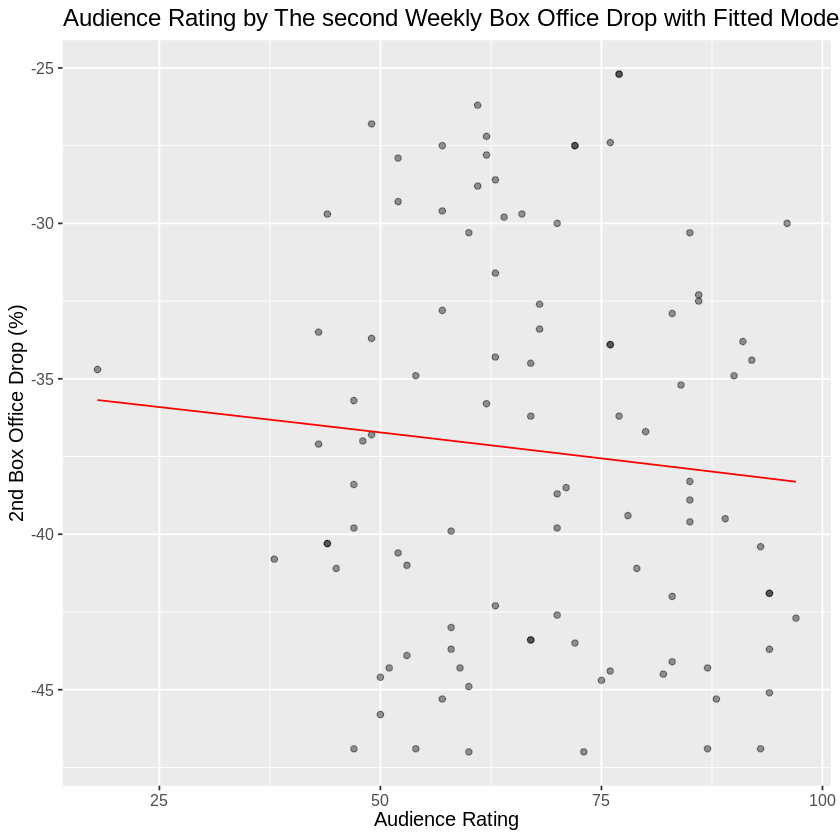

In [7]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_2)

# Visualize the data
ggplot(movie_data, aes(x = audience_rating, y = second_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Audience Rating", y = "2nd Box Office Drop (%)") +
  ggtitle("Audience Rating by The Second Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(second_box_office_drop ~ a * exp(b * audience_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = audience_rating, y = second_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Audience Rating", y = "2nd Box Office Drop (%)") +
  ggtitle("Audience Rating by The second Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: third_box_office_drop ~ a * exp(b * audience_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.989e+01  2.645e+00 -15.083   <2e-16 ***
b -1.251e-03  9.568e-04  -1.308    0.194    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.096 on 98 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.717e-06


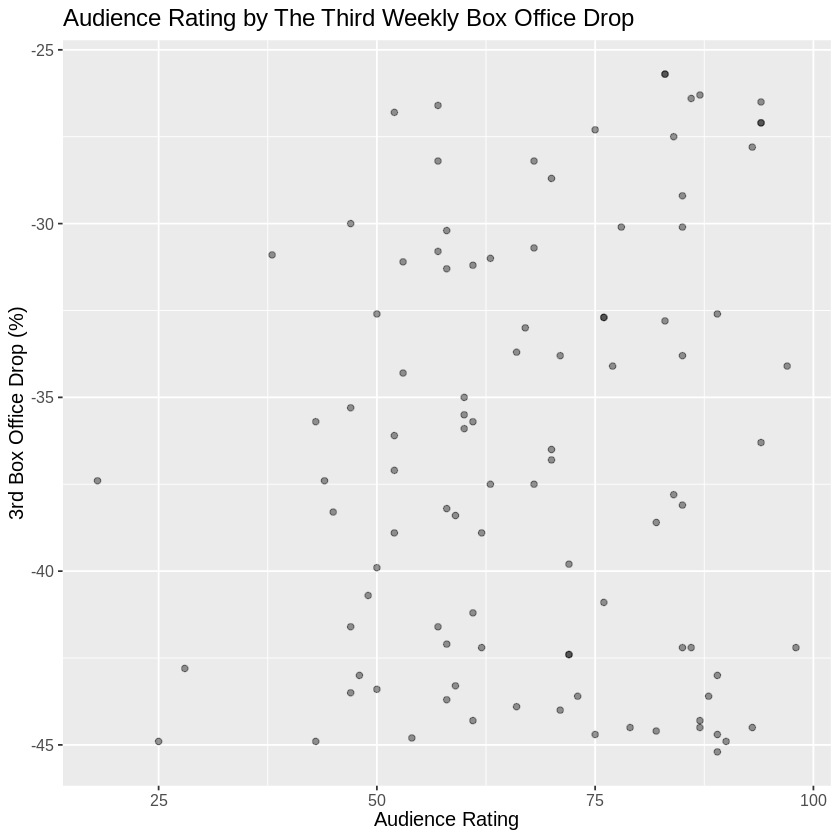

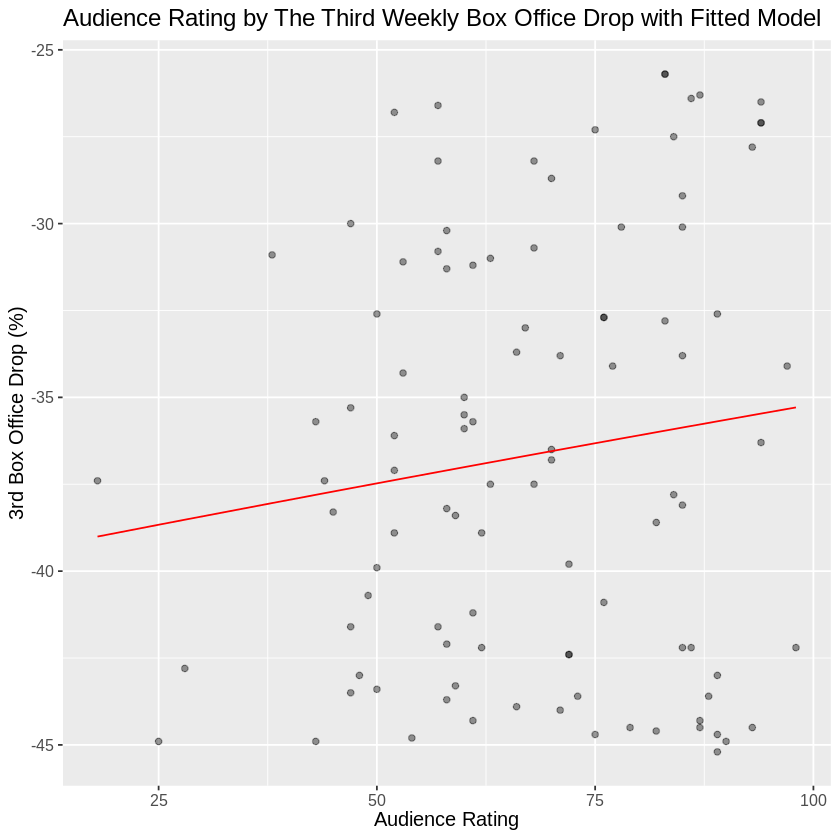

In [8]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_3)

# Visualize the data
ggplot(movie_data, aes(x = audience_rating, y = third_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Audience Rating", y = "3rd Box Office Drop (%)") +
  ggtitle("Audience Rating by The Third Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(third_box_office_drop ~ a * exp(b * audience_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = audience_rating, y = third_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Audience Rating", y = "3rd Box Office Drop (%)") +
  ggtitle("Audience Rating by The Third Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: fourth_box_office_drop ~ a * exp(b * audience_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.448e+01  2.432e+00 -14.181   <2e-16 ***
b -9.561e-05  1.011e-03  -0.095    0.925    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.911 on 98 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 4.872e-08


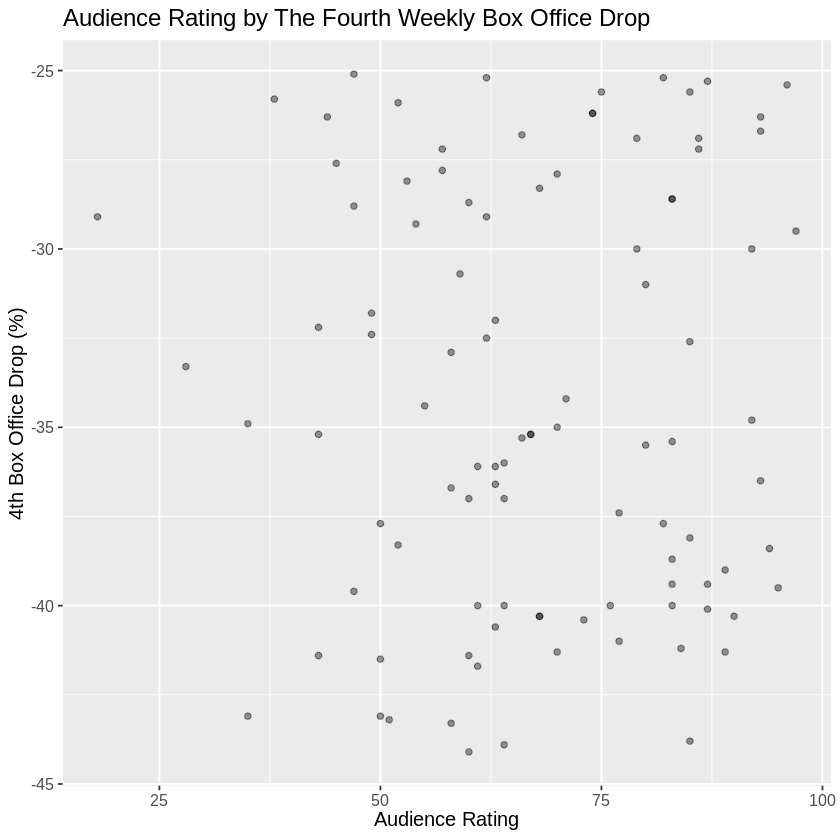

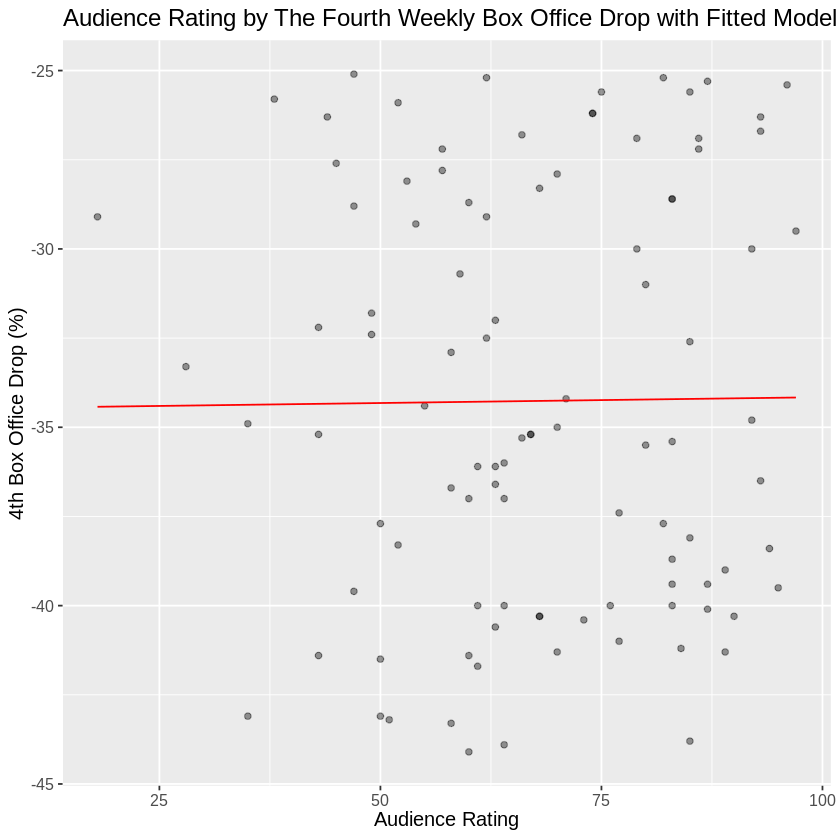

In [9]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_4)

# Visualize the data
ggplot(movie_data, aes(x = audience_rating, y = fourth_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Audience Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Audience Rating by The Fourth Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(fourth_box_office_drop ~ a * exp(b * audience_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = audience_rating, y = fourth_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Audience Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Audience Rating by The Fourth Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: first_box_office_drop ~ a * exp(b * critics_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -39.589847   3.134718 -12.629   <2e-16 ***
b  -0.001167   0.001161  -1.005    0.318    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 97 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.188e-08


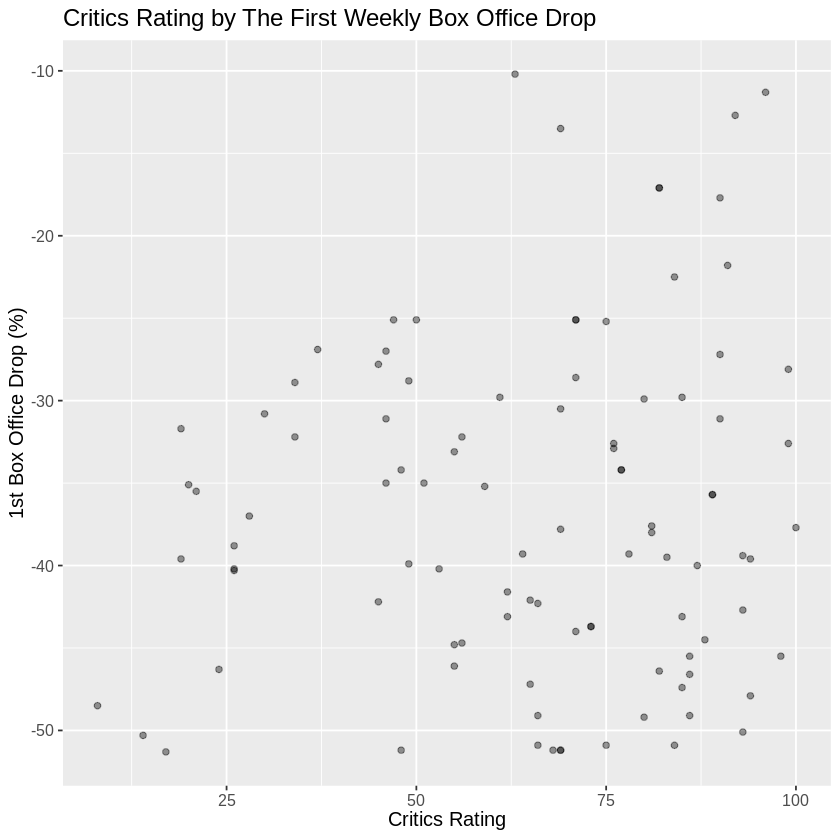

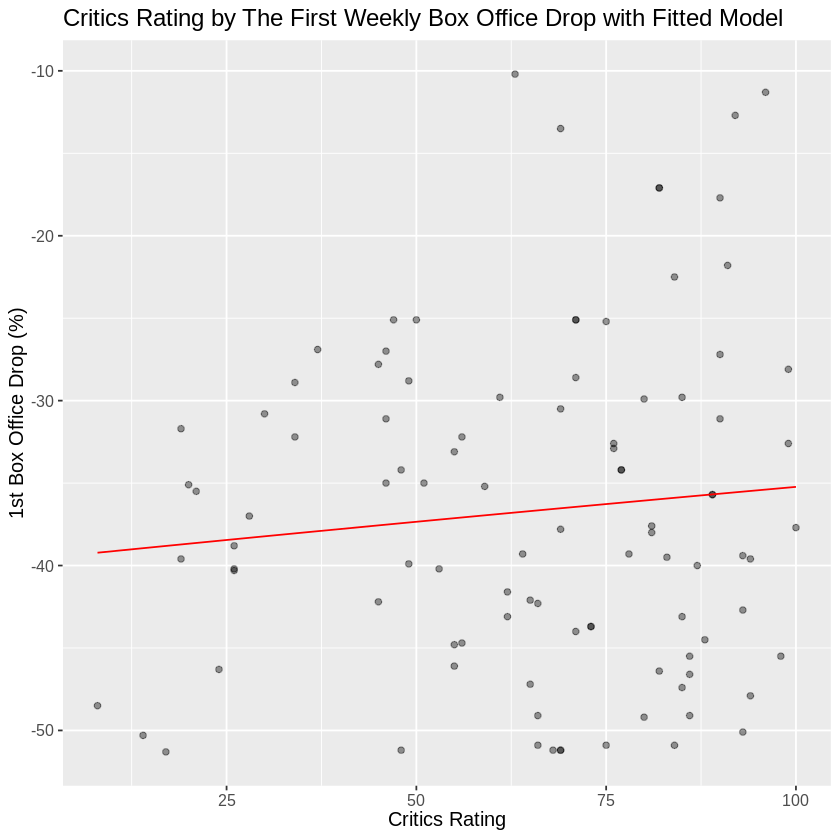

In [10]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_1)

# Visualize the data
ggplot(movie_data, aes(x = critics_rating, y = first_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Critics Rating", y = "1st Box Office Drop (%)") +
  ggtitle("Critics Rating by The First Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(first_box_office_drop ~ a * exp(b * critics_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = critics_rating, y = first_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Critics Rating", y = "1st Box Office Drop (%)") +
  ggtitle("Critics Rating by The First Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: second_box_office_drop ~ a * exp(b * critics_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.827e+01  1.781e+00 -21.487   <2e-16 ***
b -4.228e-04  7.267e-04  -0.582    0.562    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.337 on 98 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.003e-06


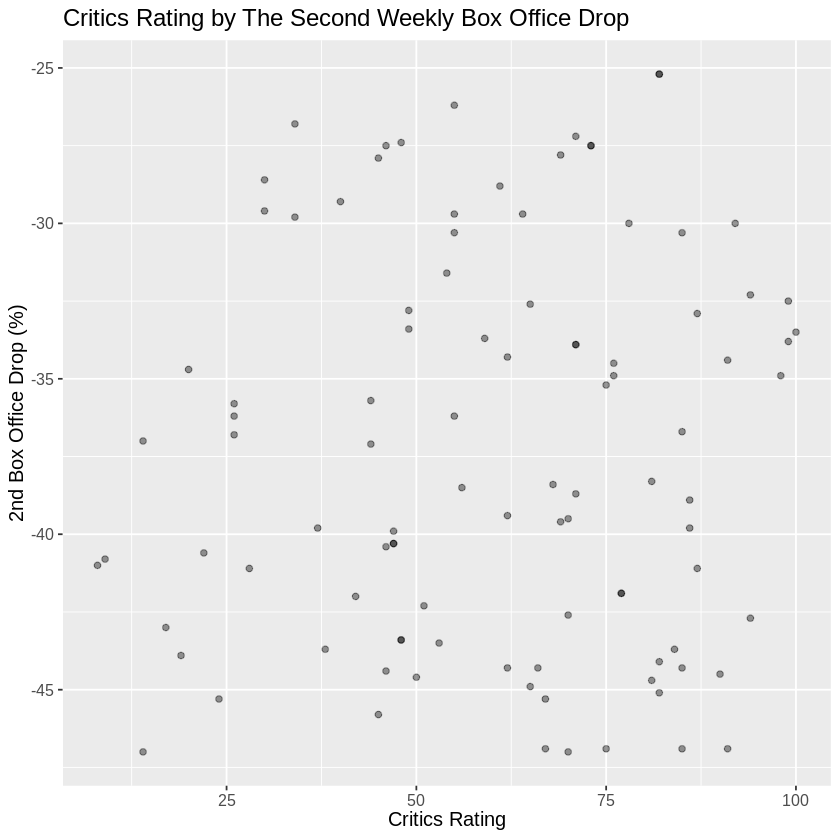

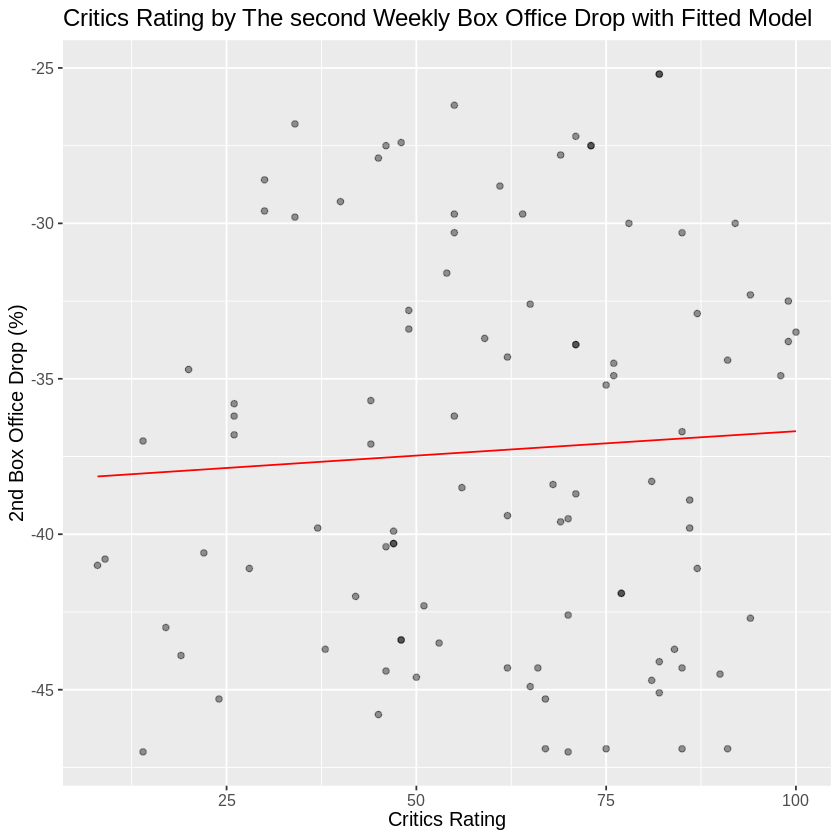

In [11]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_2)

# Visualize the data
ggplot(movie_data, aes(x = critics_rating, y = second_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Critics Rating", y = "2nd Box Office Drop (%)") +
  ggtitle("Critics Rating by The Second Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(second_box_office_drop ~ a * exp(b * critics_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = critics_rating, y = second_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Critics Rating", y = "2nd Box Office Drop (%)") +
  ggtitle("Critics Rating by The second Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: third_box_office_drop ~ a * exp(b * critics_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.734e+01  1.676e+00 -22.278   <2e-16 ***
b -2.997e-04  6.772e-04  -0.443    0.659    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.142 on 98 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 1.444e-06


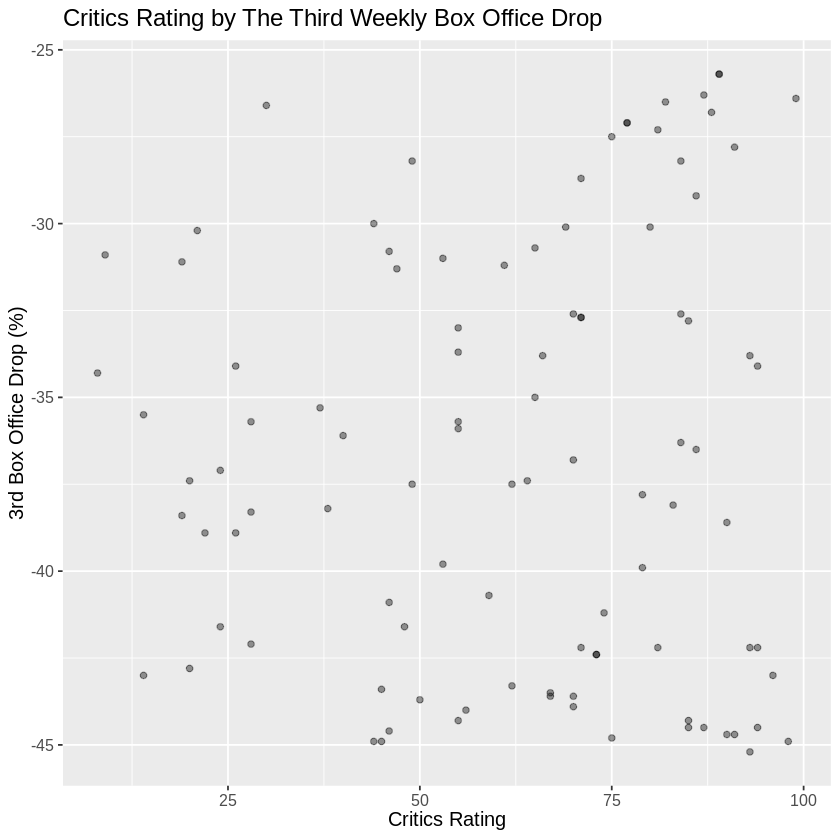

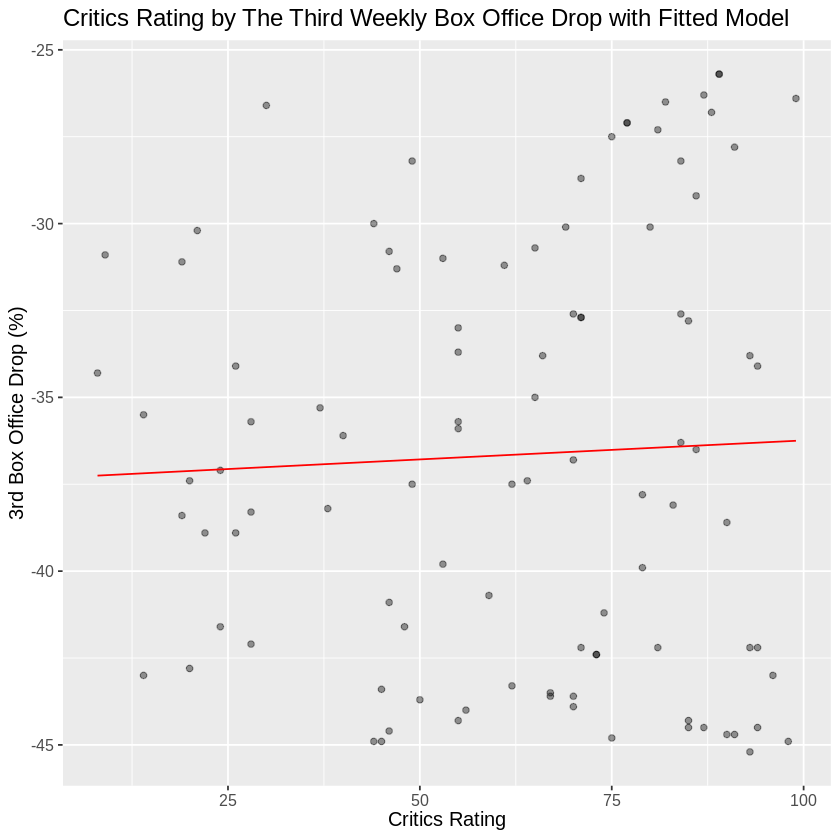

In [12]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_3)

# Visualize the data
ggplot(movie_data, aes(x = critics_rating, y = third_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Critics Rating", y = "3rd Box Office Drop (%)") +
  ggtitle("Critics Rating by The Third Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(third_box_office_drop ~ a * exp(b * critics_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = critics_rating, y = third_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Critics Rating", y = "3rd Box Office Drop (%)") +
  ggtitle("Critics Rating by The Third Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))


Formula: fourth_box_office_drop ~ a * exp(b * critics_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.673e+01  1.613e+00 -22.766   <2e-16 ***
b -1.114e-03  6.613e-04  -1.684   0.0953 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.826 on 98 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 6.57e-07


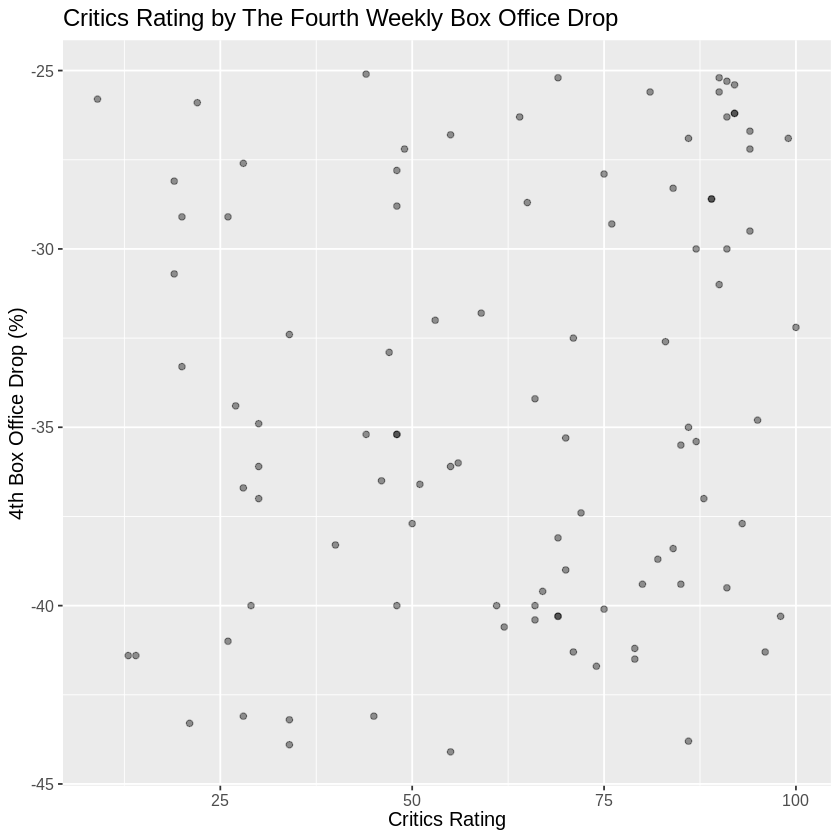

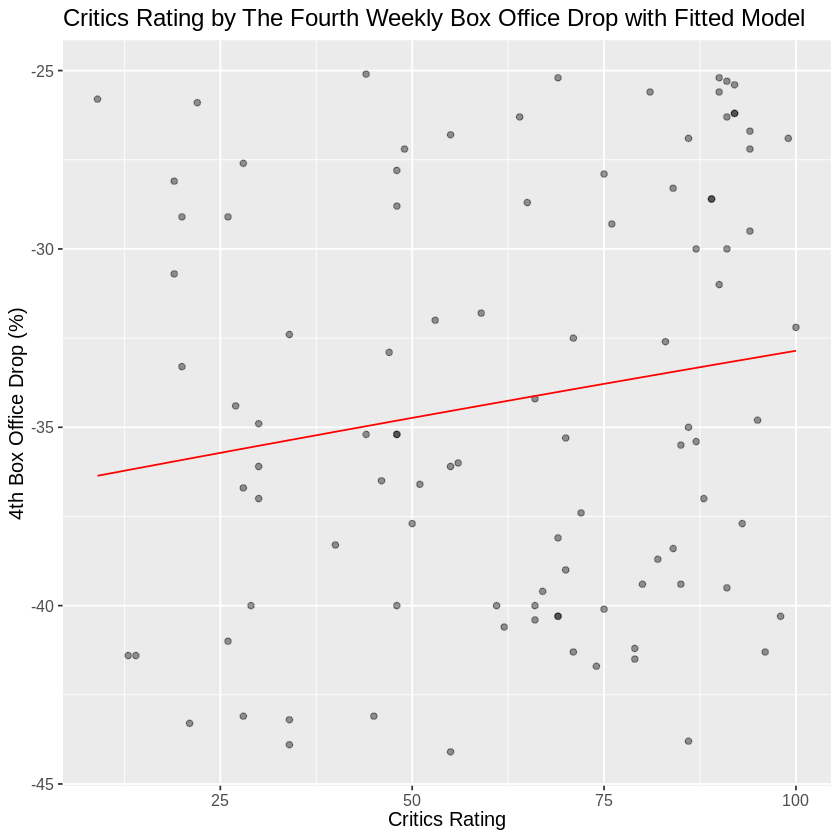

In [13]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(remove_special_point_4)

# Visualize the data
ggplot(movie_data, aes(x = critics_rating, y = fourth_box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Critics Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Critics Rating by The Fourth Weekly Box Office Drop") +
  theme(text = element_text(size = 12))

# Define and fit the non-linear model
model <- nls(fourth_box_office_drop ~ a * exp(b * critics_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = critics_rating, y = fourth_box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Critics Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Critics Rating by The Fourth Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12))

In [20]:
summary(movies$first_box_office_drop)
summary(movies$second_box_office_drop)
summary(movies$third_box_office_drop)
summary(movies$fourth_box_office_drop)

remove_special_point <- movies |>
  filter(first_box_office_drop > -51.45 & first_box_office_drop < -9.90) |>
  filter(second_box_office_drop > -47.05 & second_box_office_drop < -25.07) |>
  filter(third_box_office_drop > -45.23 & third_box_office_drop < -25.65) |>
  filter(fourth_box_office_drop > -44.12 & fourth_box_office_drop < -25.00)
head(remove_special_point)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -74.50   -51.45   -37.80   278.08    -9.90 38199.80        1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -64.30  -47.05  -38.35  -17.46  -25.07 2016.30 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -83.70   -45.23   -37.25   163.98   -25.65 35989.20 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -64.70   -44.12   -35.20    53.70   -25.00 15852.60 

movie_name                       audience_rating critics_rating
1 Mamma Mia!                       66              55            
2 Once Upon a Time... in Hollywood 70              86            
3 Identity Thief                   53              19            
4 The Nutty Professor              44              64            
5 Central Intelligence             62              71            
6 Ocean's Twelve                   60              55            
  first_box_office_drop second_box_office_drop third_box_office_drop
1 -33.1                 -29.7                  -33.7                
2 -49.1                 -39.8                  -36.5                
3 -31.7                 -43.9                  -31.1                
4 -39.3                 -29.7                  -37.4                
5 -44.0                 -27.2                  -42.2                
6 -44.8                 -30.3                  -35.9                
  fourth_box_office_drop domestic_box_office_opening distributor            
1 -26.8                  27751240                    Universal Pictures     
2 -35.0                  41082018                    Sony Pictures Releasing
3 -28.1                  34551025                    Universal Pictures     
4 -26.3                  25411725                    Universal Pictures     
5 -32.5                  35535250                    Warner Bros.           
6 -44.1                  39153380                    Warner Bros.           
  genre                 
1 Comedy Musical Romance
2 Comedy Drama          
3 Comedy Crime Drama    
4 Comedy Romance Sci-Fi 
5 Action Comedy Crime   
6 Crime Thriller

In [21]:
movies_1 <- remove_special_point |>
    pivot_longer(cols = first_box_office_drop:fourth_box_office_drop,
                 names_to = "week",
                 values_to = "box_office_drop")
head(movies_1)

movie_name                       audience_rating critics_rating
1 Mamma Mia!                       66              55            
2 Mamma Mia!                       66              55            
3 Mamma Mia!                       66              55            
4 Mamma Mia!                       66              55            
5 Once Upon a Time... in Hollywood 70              86            
6 Once Upon a Time... in Hollywood 70              86            
  domestic_box_office_opening distributor             genre                 
1 27751240                    Universal Pictures      Comedy Musical Romance
2 27751240                    Universal Pictures      Comedy Musical Romance
3 27751240                    Universal Pictures      Comedy Musical Romance
4 27751240                    Universal Pictures      Comedy Musical Romance
5 41082018                    Sony Pictures Releasing Comedy Drama          
6 41082018                    Sony Pictures Releasing Comedy Drama          
  week                   box_office_drop
1 first_box_office_drop  -33.1          
2 second_box_office_drop -29.7          
3 third_box_office_drop  -33.7          
4 fourth_box_office_drop -26.8          
5 first_box_office_drop  -49.1          
6 second_box_office_drop -39.8


Formula: box_office_drop ~ a * exp(b * critics_rating)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.509e+01  1.650e+00 -21.263   <2e-16 ***
b  4.690e-04  6.953e-04   0.675    0.502    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.314 on 98 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 8.942e-06


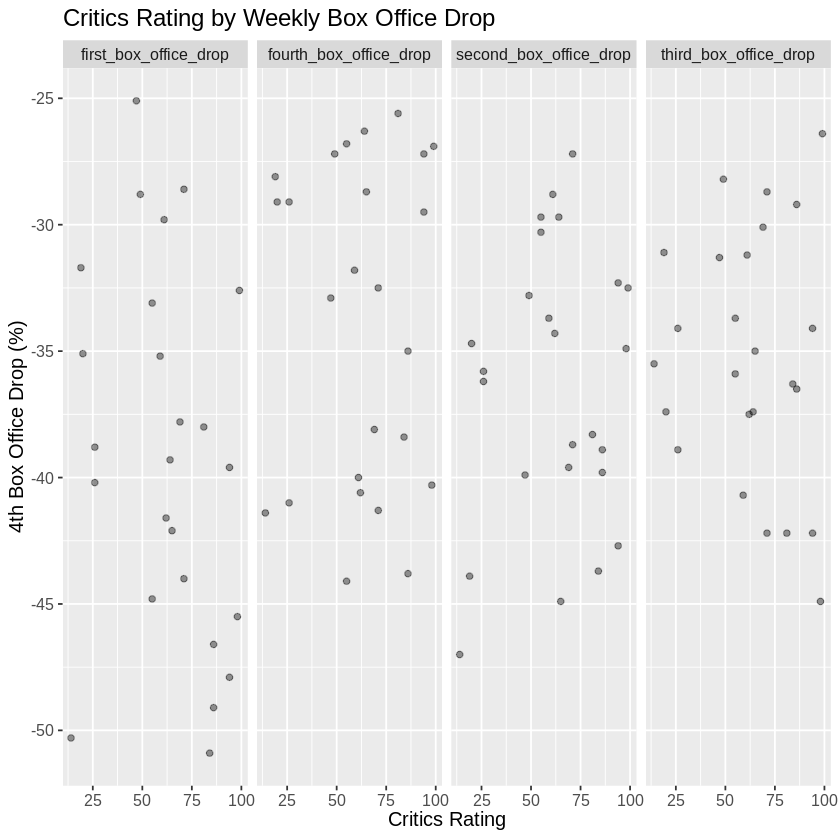

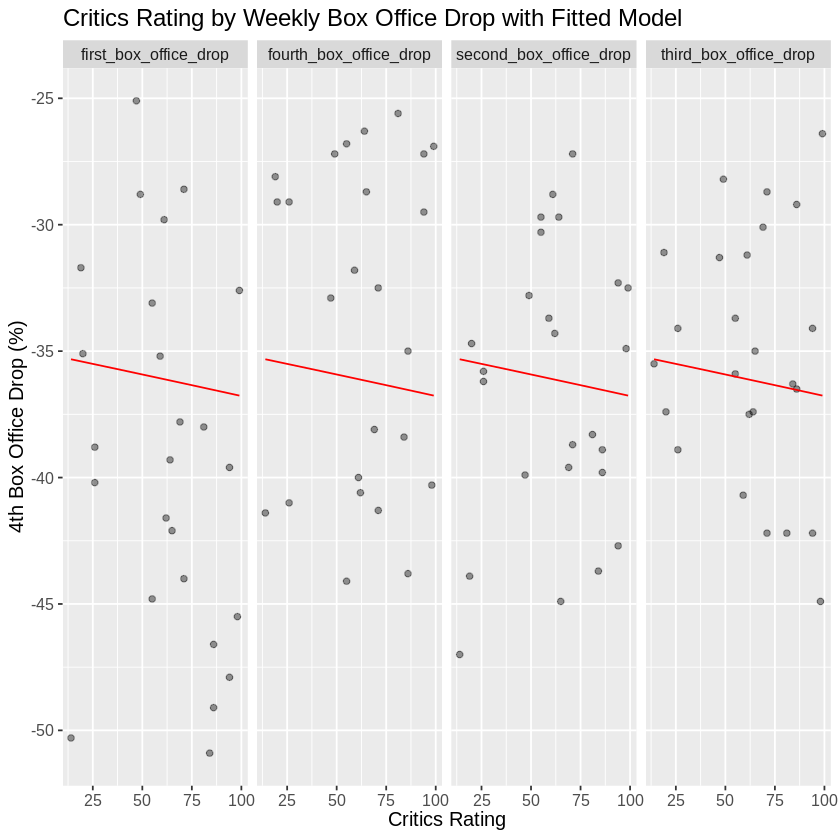

In [29]:
# Load the necessary libraries
# library(ggplot2)
# library(nlstools)

# Example dataset, replace this with your actual dataset
movie_data <- data.frame(movies_1)

# Visualize the data
ggplot(movie_data, aes(x = critics_rating, y = box_office_drop)) +
  geom_point(alpha = 0.4) +
  labs(x = "Critics Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Critics Rating by Weekly Box Office Drop") +
  theme(text = element_text(size = 12)) +
  facet_grid(~ week)

# Define and fit the non-linear model
model <- nls(box_office_drop ~ a * exp(b * critics_rating), 
             data = movie_data, 
             start = list(a = -20, b = -0.04))

# Summary of the model
summary(model)

# Predict values
movie_data$predicted_drop <- predict(model, newdata = movie_data)

# Plot original data and fitted line
ggplot(movie_data, aes(x = critics_rating, y = box_office_drop)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = predicted_drop), color = "red") +
  labs(x = "Critics Rating", y = "4th Box Office Drop (%)") +
  ggtitle("Critics Rating by Weekly Box Office Drop with Fitted Model") +
  theme(text = element_text(size = 12)) +
  facet_grid(~ week)